In [1]:
import pandas as pd                                                       # data manipulation and analysis
import numpy as np                                                        # numerical computations and array operations
import seaborn as sns                                                     # statistical data visualization
import matplotlib.pyplot as plt                                           # creating plots and visualizations
from sklearn.model_selection import train_test_split, cross_val_score     # splitting data and cross-validation
from sklearn.preprocessing import StandardScaler, OneHotEncoder           # preprocessing tools for scaling and encoding
from sklearn.impute import SimpleImputer                                  # preprossessing tools for handling missing values
from sklearn.linear_model import LinearRegression                         # regression analysis
import tensorflow as tf                                                   # neural network
from sklearn.neighbors import KNeighborsRegressor                         # knn model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error        

In [2]:
fitness = pd.read_csv('flexfield_fitness.csv')
fitness.head(3)

,Customer ID,Gender,Age,Hours at Gym (per week),Fitness Goal,Gym Membership Length (years),Calorie Intake
0,221958,Female,27,7.3,Build muscle,4,NaN
1,771155,Female,24,6.2,Endurance training,4,2173.0
2,231932,Male,22,7.4,Fat loss,2,1752.0


In [3]:
coreboost = pd.read_csv('coreboost.csv')
coreboost.head(3)

,Customer ID,Gender,Age,Hours at Gym (per week),Fitness Goal,Preferred Sports Drink Type,Average Weekly Consumption (Bottles)
0,221958,Female,27,7.3,Build muscle,Electrolyte,10
1,771155,Female,24,6.2,Endurance training,Electrolyte,11
2,231932,Male,22,7.4,Fat loss,Electrolyte,12


In [4]:
fitness['Hours at Gym (per week)'].fillna(0, inplace = True)
coreboost['Hours at Gym (per week)'].fillna(0, inplace = True)

C:\Users\csh03\AppData\Local\Temp\ipykernel_26512\25981652.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fitness['Hours at Gym (per week)'].fillna(0, inplace = True)
C:\Users\csh03\AppData\Local\Temp\ipykernel_26512\25981652.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [5]:
fitness = fitness.dropna(how='any',axis=0)
coreboost = coreboost.dropna(how='any', axis=0)

In [6]:
merged_data = pd.merge(fitness, coreboost, on = ['Customer ID', 'Gender', 'Age', 'Hours at Gym (per week)', 'Fitness Goal'], how = 'inner')
merged_data.head(3)

,Customer ID,Gender,Age,Hours at Gym (per week),Fitness Goal,Gym Membership Length (years),Calorie Intake,Preferred Sports Drink Type,Average Weekly Consumption (Bottles)
0,771155,Female,24,6.2,Endurance training,4,2173.0,Electrolyte,11
1,231932,Male,22,7.4,Fat loss,2,1752.0,Electrolyte,12
2,465838,Female,23,6.0,Build muscle,0,2884.0,Protein shakes,10


In [7]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Customer ID                           911 non-null    int64  
 1   Gender                                911 non-null    object 
 2   Age                                   911 non-null    int64  
 3   Hours at Gym (per week)               911 non-null    float64
 4   Fitness Goal                          911 non-null    object 
 5   Gym Membership Length (years)         911 non-null    int64  
 6   Calorie Intake                        911 non-null    float64
 7   Preferred Sports Drink Type           911 non-null    object 
 8   Average Weekly Consumption (Bottles)  911 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 64.2+ KB


In [8]:
import statsmodels.formula.api as smf
# includes interaction terms between hours at gym, dietary preferences, calorie intake, and gym membership length
formula = 'Q("Average Weekly Consumption (Bottles)") ~ Q("Hours at Gym (per week)")  * Q("Fitness Goal") * Q("Gym Membership Length (years)") * Q("Preferred Sports Drink Type")'

# fit the linear regression model
model = smf.ols(formula=formula, data=merged_data).fit()

model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        OLS Regression Results                                       
=====================================================================================================
Dep. Variable:     Q("Average Weekly Consumption (Bottles)")   R-squared:                       0.198
Model:                                                   OLS   Adj. R-squared:                  0.122
Method:                                        Least Squares   F-statistic:                     2.595
Date:                                       Sun, 27 Oct 2024   Prob (F-statistic):           2.50e-11
Time:                                               12:49:58   Log-Likelihood:                -2029.2
No. Observations:                                        911   AIC:                             4218.
Df Residuals:                                            831   BIC:                             4604.
Df Model:                                                 79                                         
Covariance Type:                                   nonrobust                                         
==============================================================================================================================================================================================================================
                                                                                                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                                                                                     12.6762      1.575      8.049      0.000       9.585      15.768
Q("Fitness Goal")[T.Endurance training]                                                                                                                       -2.3180      2.565     -0.904      0.366      -7.353       2.717
Q("Fitness Goal")[T.Fat loss]                                                                                                                                 -2.6631      2.183     -1.220      0.223      -6.948       1.621
Q("Fitness Goal")[T.Flexibility]                                                                                                                             -11.9515      6.739     -1.773      0.077     -25.180       1.277
Q("Fitness Goal")[T.General health]                                                                                                                           -5.5578      2.099     -2.648      0.008      -9.677      -1.438
Q("Preferred Sports Drink Type")[T.Energy drinks]                                                                                                             -4.2705      3.581     -1.192      0.233     -11.300       2.759
Q("Preferred Sports Drink Type")[T.Fresh juice]                                                                                                               -9.5830      5.247     -1.826      0.068     -19.882       0.716
Q("Preferred Sports Drink Type")[T.Protein shakes]                                                                                                            -4.5568      1.857     -2.454      0.014      -8.202      -0.912
Q("Fitness Goal")[T.Endurance training]:Q("Preferred Sports Drink Type")[T.Energy drinks]                                                                     14.0121     10.887      1.287      0.198      -7.358      35.382
Q("Fitness Goal")[T.Fat loss]:Q("Preferred Sports Drink Type")[T.Energy drinks]                                                                           

In [9]:
formula = 'Q("Average Weekly Consumption (Bottles)") ~ Q("Hours at Gym (per week)") * Q("Gym Membership Length (years)") * Q("Preferred Sports Drink Type")'

# fit the linear regression model
model = smf.ols(formula=formula, data=merged_data).fit()

model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        OLS Regression Results                                       
=====================================================================================================
Dep. Variable:     Q("Average Weekly Consumption (Bottles)")   R-squared:                       0.109
Model:                                                   OLS   Adj. R-squared:                  0.094
Method:                                        Least Squares   F-statistic:                     7.307
Date:                                       Sun, 27 Oct 2024   Prob (F-statistic):           2.13e-15
Time:                                               12:49:59   Log-Likelihood:                -2077.0
No. Observations:                                        911   AIC:                             4186.
Df Residuals:                                            895   BIC:                             4263.
Df Model:                                                 15                                         
Covariance Type:                                   nonrobust                                         
======================================================================================================================================================================================
                                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                                              9.0399      0.751     12.040      0.000       7.566      10.513
Q("Preferred Sports Drink Type")[T.Energy drinks]                                                                      0.6579      2.221      0.296      0.767      -3.701       5.017
Q("Preferred Sports Drink Type")[T.Fresh juice]                                                                       -0.9565      1.166     -0.820      0.412      -3.246       1.333
Q("Preferred Sports Drink Type")[T.Protein shakes]                                                                    -0.5601      1.028     -0.545      0.586      -2.578       1.458
Q("Hours at Gym (per week)")                                                                                           0.0939      0.135      0.694      0.488      -0.172       0.359
Q("Hours at Gym (per week)"):Q("Preferred Sports Drink Type")[T.Energy drinks]                                        -0.1426      0.403     -0.353      0.724      -0.934       0.649
Q("Hours at Gym (per week)"):Q("Preferred Sports Drink Type")[T.Fresh juice]                                           0.1762      0.219      0.804      0.422      -0.254       0.606
Q("Hours at Gym (per week)"):Q("Preferred Sports Drink Type")[T.Protein shakes]                                        0.0466      0.188      0.248      0.804      -0.322       0.415
Q("Gym Membership Length (years)")                                                                                     0.0063      0.283      0.022      0.982      -0.549       0.562
Q("Gym Membership Length (years)"):Q("Preferred Sports Drink Type")[T.Energy drinks]                                  -0.0763      0.696     -0.110      0.913      -1.442       1.290
Q("Gym Membership Length (years)"):Q("Preferred Sports Drink Type")[T.Fresh juice]                                    -0.1562      0.491     -0.318      0.751      -1.121       0.808
Q("Gym Membership Length (years)"):Q("Preferred Sports Drink Type")[T.Protein shakes]                                  0.1403      0.385      0.364      0.716      -0.616       0.897
Q("Hours at Gym (per week)"):Q("Gym Membership Length (years)")                      

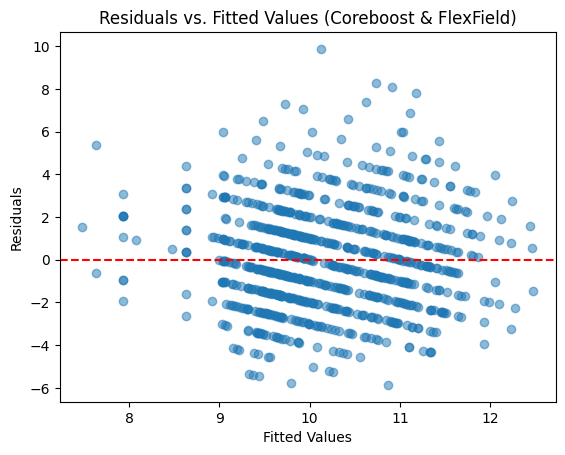

In [10]:
fitted = model.fittedvalues
residuals = model.resid

plt.scatter(fitted, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values (Coreboost & FlexField)")
plt.show()

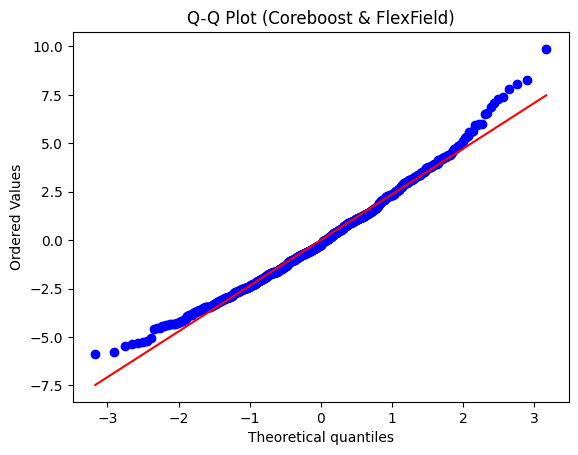

In [11]:
import scipy.stats as stats

# Q-Q plot using scipy
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot (Coreboost & FlexField)")
plt.show()